In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv("dew-point-pitching/data.csv")
df

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,...,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,2,1,1,1,0,0,...,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,2,2,1,1,0,0,...,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,2,2,2,1,0,0,...,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


In [3]:
horz_break = abs(df['HORIZONTAL_BREAK'])

In [4]:
cols = ['THROW_SIDE_KEY', 'PITCH_TYPE_TRACKED_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']
data_cols = ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']
data_cols_w_inning = ['INNING_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']


In [5]:
pitch_data = df[cols]

In [6]:
pitch_data = pd.get_dummies(pitch_data)

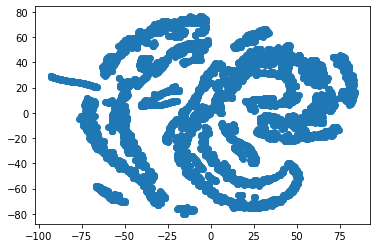

In [7]:
embeddings =TSNE(n_components=2, learning_rate='auto', init='random', perplexity=35).fit_transform(pitch_data.to_numpy())
plt.scatter(embeddings[:,0], embeddings[:,1])

In [30]:
mask = (df['THROW_SIDE_KEY'] == 'R') & (df['PITCHER_KEY'] == 668881)
specific_pitch = df[mask]
# mask

In [31]:
effects = specific_pitch[data_cols]
effects = pd.get_dummies(effects)
effects.shape

(516, 11)

{'FB': array([0.5, 0. , 1. , 1. ]), 'SL': array([0.16666667, 0.8660254 , 0.8660254 , 1.        ]), 'UN': array([0.83333333, 0.8660254 , 0.5       , 1.        ]), 'CH': array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])}
                        PID  INNING_KEY  BATTER_IN_INNING_KEY  PITCH_NUMBER  \
PITCH_TYPE_TRACKED_KEY                                                        
CH                       29          29                    29            29   
FB                      268         268                   268           268   
SL                      218         218                   218           218   
UN                        1           1                     1             1   

                        OUT_KEY  BALLS  STRIKES  IS_RUNNER_ON_1B  \
PITCH_TYPE_TRACKED_KEY                                             
CH                           29     29       29               29   
FB                          268    268      268              268   
SL              

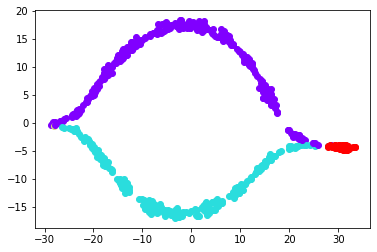

In [44]:
embeddings =TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(effects.to_numpy())
inning_key = specific_pitch['PITCH_TYPE_TRACKED_KEY']

colors = cm.rainbow(np.linspace(0, 1, len(inning_key.unique())))
c_map = {i:colors[k] for k,i in enumerate(inning_key.unique())}

for y, i in zip(embeddings, inning_key):
    plt.scatter(y[0], y[1], color=c_map[i])

# plt.legend()

print(c_map)

print(specific_pitch.groupby(by='PITCH_TYPE_TRACKED_KEY').count())

# print(TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit(effects.to_numpy()).get_feature_names_out())
# plt.scatter(embeddings[:,0], embeddings[:,1])

In [205]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(effects)

In [206]:
acc = []
for i in range(effects.shape[1]):
    pca = PCA(n_components=i)
    pca.fit(scaled_df)
    acc.append(sum(pca.explained_variance_ratio_))



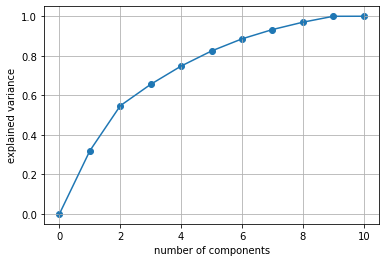

In [207]:
# plt.bar([f'PC{i}' for i in range(len(pca.explained_variance_ratio_))], pca.explained_variance_ratio_)
plt.scatter([i for i in range(effects.shape[1])], acc)
plt.plot([i for i in range(effects.shape[1])], acc)
plt.ylabel("explained variance")
plt.xlabel("number of components")
plt.grid()
plt.show()

In [208]:
pca = PCA(n_components=9)
pca.fit(scaled_df)

PCA(n_components=9)

In [209]:
d9_pca = pd.DataFrame(pca.components_, columns=data_cols)
d9_pca['explained_var'] = pca.explained_variance_ratio_

In [210]:
d9_pca_abs = abs(d9_pca)
d9_pca_abs.to_csv('figures/pca_9dim_668881_SL.csv', index=False)
d9_pca_abs.style.background_gradient(cmap ='viridis')

,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,explained_var
0,0.249237,0.247378,0.186220,0.121119,0.290355,0.109842,0.227704,0.419676,0.439366,0.418510,0.367146,0.319411
1,0.377678,0.366091,0.105147,0.485519,0.333990,0.362364,0.031899,0.217002,0.113372,0.254001,0.328964,0.227871
2,0.065996,0.298092,0.578298,0.265258,0.066368,0.164003,0.481518,0.076855,0.368991,0.000777,0.311083,0.108371
3,0.334087,0.041394,0.482236,0.098543,0.002690,0.491413,0.283626,0.315550,0.244110,0.329810,0.233529,0.092419
4,0.042815,0.409802,0.045235,0.208124,0.270327,0.297138,0.528311,0.420461,0.225719,0.257411,0.224478,0.076346
5,0.275476,0.177032,0.478771,0.079798,0.386660,0.420577,0.550378,0.008899,0.076418,0.137397,0.055490,0.061273
6,0.422059,0.057285,0.197024,0.317581,0.610053,0.524785,0.076260,0.060548,0.106588,0.096624,0.034155,0.046984
7,0.621363,0.522933,0.078298,0.182584,0.241395,0.187309,0.033312,0.081655,0.177841,0.287760,0.292259,0.037215
8,0.090277,0.446248,0.333265,0.691300,0.351069,0.050237,0.213948,0.072009,0.022760,0.125646,0.103509,0.029938


In [211]:
#most informative column across all components
d9_pca_abs[data_cols].max(axis=0)

INDUCED_VERTICAL_BREAK       0.621363
HORIZONTAL_BREAK             0.522933
SPIN_RATE_ABSOLUTE           0.578298
RELEASE_SPEED                0.691300
RELEASE_SIDE                 0.610053
RELEASE_HEIGHT               0.524785
RELEASE_EXTENSION            0.550378
HORIZONTAL_APPROACH_ANGLE    0.420461
VERTICAL_APPROACH_ANGLE      0.439366
PLATE_X                      0.418510
PLATE_Z                      0.367146
dtype: float64

In [212]:
#most informative column for each component
d9_pca_abs[data_cols].idxmax(axis=1)

0    VERTICAL_APPROACH_ANGLE
1              RELEASE_SPEED
2         SPIN_RATE_ABSOLUTE
3             RELEASE_HEIGHT
4          RELEASE_EXTENSION
5          RELEASE_EXTENSION
6               RELEASE_SIDE
7     INDUCED_VERTICAL_BREAK
8              RELEASE_SPEED
dtype: object